<a href="https://colab.research.google.com/github/irvyn/image-enhancement-colab/blob/main/image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Image Enhancement

## Table of Contents
1. [Libraries](#libraries)
2. [Histogram Equalization](#hist)
3. [Denoising with Filters](#denoising)
4. [Challenge](#challenge)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [39]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage import exposure
import skimage
from scipy.ndimage.filters import gaussian_filter as gauss
from scipy.ndimage.filters import median_filter as med
import cv2

/tmp/ipython-input-3972790099.py:7: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter as gauss
/tmp/ipython-input-3972790099.py:8: DeprecationWarning: Please import `median_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import median_filter as med


In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


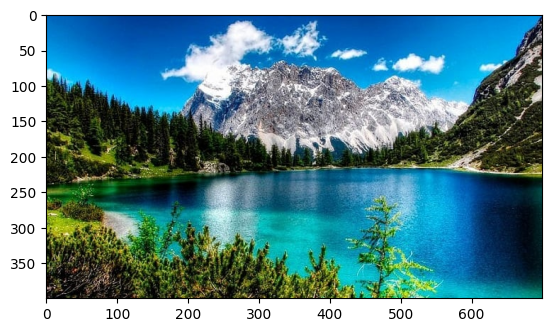

In [41]:
original_image = Image.open('data/image.jpg')
plt.imshow(original_image)
type(original_image)

# Save the image
np.save('data/img.npy', original_image)

#Load the image
original_image = np.load('data/img.npy')

## Histogram Equalization<a class="anchor" id="hist" ></a>

Let's look at the distribution of pixel values in the image.

Ideally, the image should have relatively even distribution of values, indicating good contrast and making it easier to extract analytical information.

An easy way to check this is to plot a histogram.

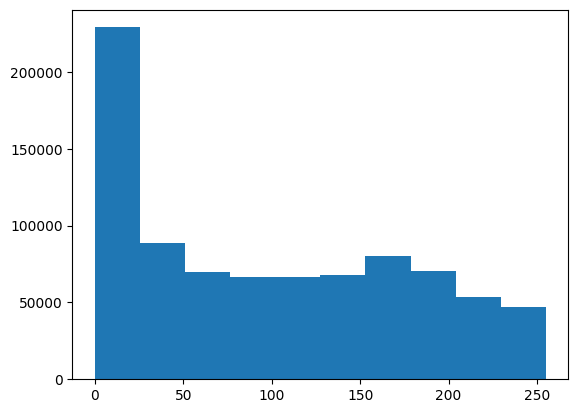

In [42]:
# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(original_image.ravel())
plt.show()

Another useful way to visualize the statistics of an image is as a cumulative distribution function (CDF) plot. Which shows the cumulative pixel intensity frequencies from 0 to 255.

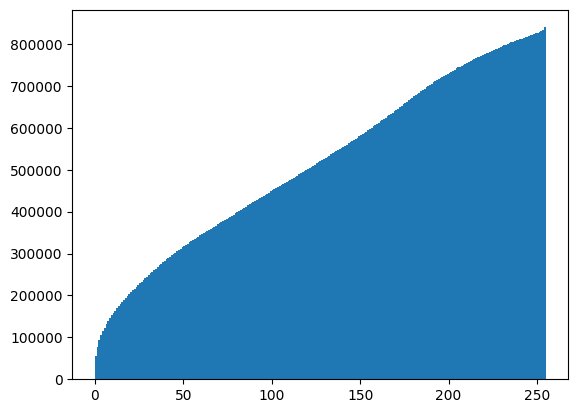

In [43]:
plt.hist(original_image.ravel(), bins=255, cumulative=True)
plt.show()

The histogram and CDF for our image show pretty uneven distribution - there's a lot of contrast in the image. Ideally we should equalize the values in the images we want to analyse to try to make our images more consistent in terms of the shapes they contain irrespective of light levels.

Histogram equalization is often used to improve the statistics of images. In simple terms, the histogram equalization algorithm attempts to adjust the pixel values in the image to create a more uniform distribution. The code in the cell below uses the  **exposure.equalize_hist** method from the **skimage** package to equalize the image.  

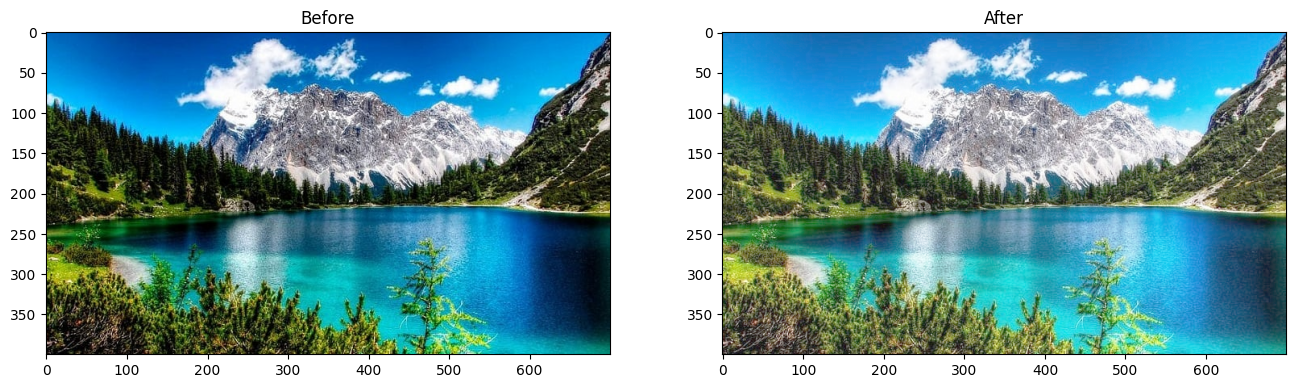

In [44]:
original_image_eq = exposure.equalize_hist(original_image)

fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(original_image_eq)
a.set_title('After')

plt.show()

As with most image operations, there's more than one way to do this. For example, you could also use the **PIL.ImgOps.equalize** method:

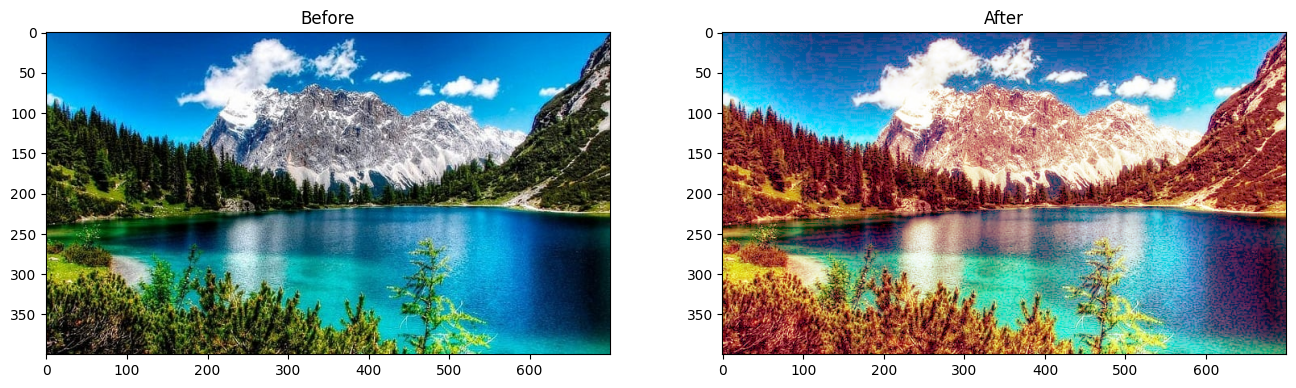

In [45]:

# Equalize the image - but we need to convert the numpy array back to the PIL image format
image_PIL_eq = ImageOps.equalize(Image.fromarray(original_image))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(original_image)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(image_PIL_eq)
a.set_title('After')

plt.show()

Now let's see what that's done to the histogram and CDF plots:

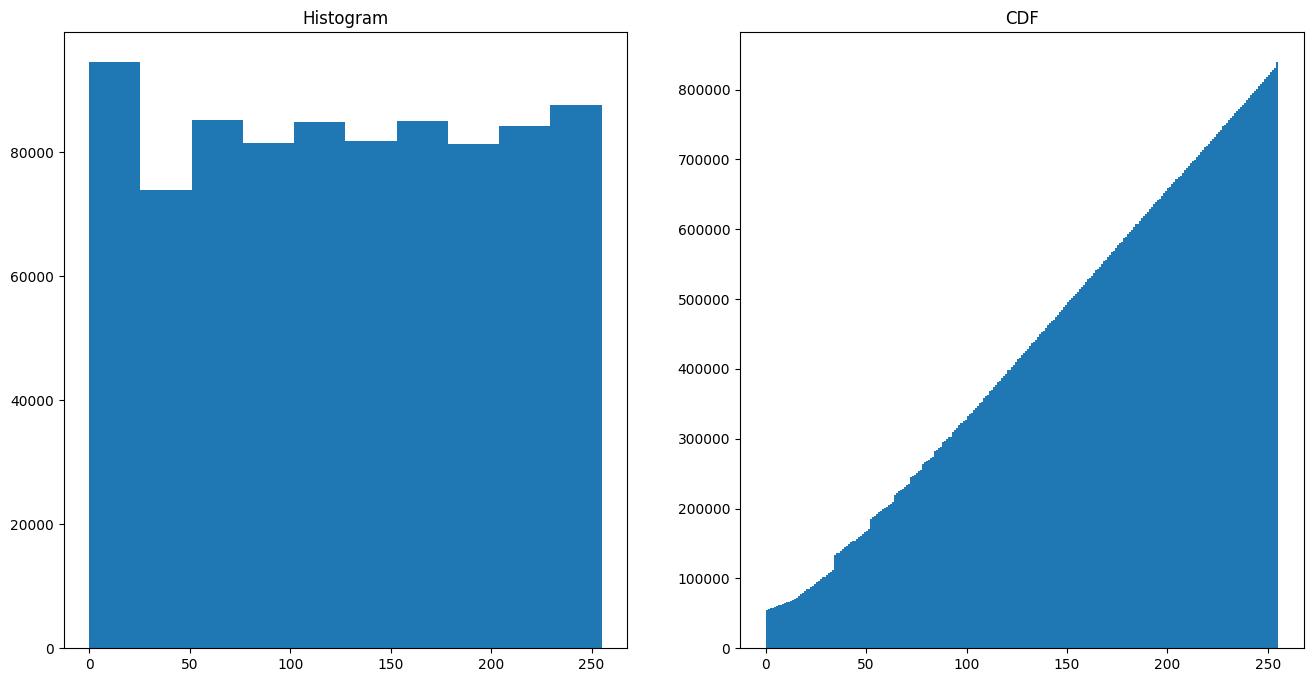

In [46]:
# Display histograms
img_eq = np.array(image_PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

The pixel intensities are more evenly distributed in the equalized image. In particular, the cumulative density shows a straight diagonal cumulation; which is a good sign that the pixel intensity values have been equalized.

## Denoising with Filters <a class="anchor" id="denoising" ></a>

Often images need to be cleaned up to remove "salt and pepper" noise.

### Add Some Random Noise
Let's add some random noise to our image - such as you might see in a photograph taken in low light or at a low resolution.

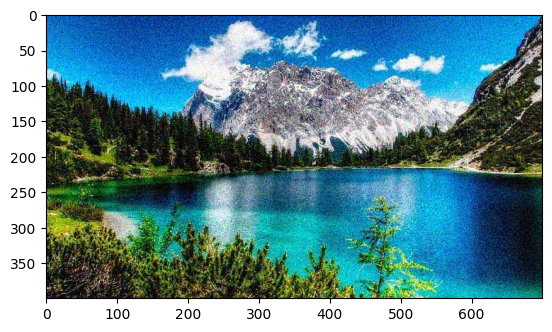

In [47]:
img_n = skimage.util.random_noise(original_image)
plt.imshow(img_n)

### Using a Gaussian Filter
A Gaussian filter applies a weighted average (mean) value for pixels based on the pixels that surround them.

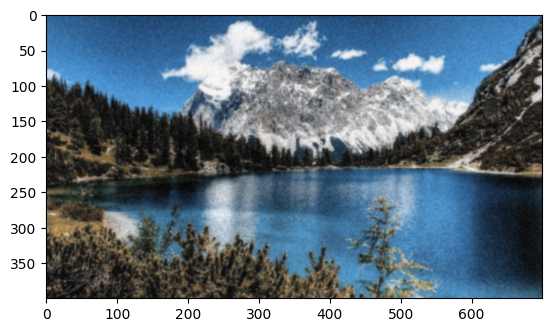

In [48]:
img3_gauss = gauss(img_n, sigma=1)
plt.imshow(img3_gauss)

### Using a Median Filter
The Gaussian filter results in a blurred image, which may actually be better for feature extraction as it makes it easier to find contrasting areas. If it's too blurred, we could try a median filter, which as the name suggests applies the median value to pixels based on the pixels around them.

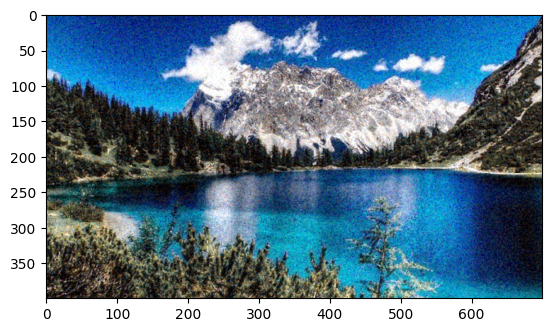

In [49]:
img_med = med(img_n, size=2)
plt.imshow(img_med)

## Challenge <a class="anchor" id="challenge" ></a>

Now, try solving this challenge, you must equalize different windows of the same image in a splitted way.

In [50]:
#from image_slicer import slice

import image_slicer

n = 4
slice('data/image.jpg', n)

slice('data/image.jpg', 4, None)

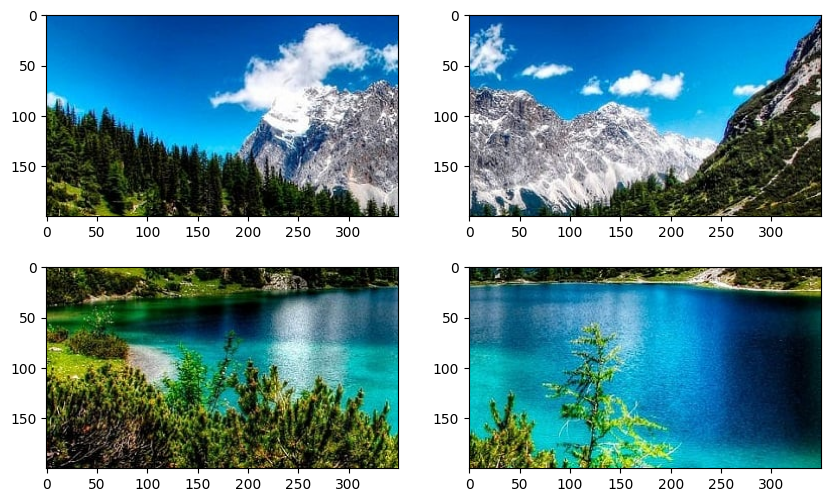

In [51]:
fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1)
img = Image.open(f'data/image_01_01.png')
plt.imshow(img)

plt.subplot(2,2,2)
img = Image.open(f'data/image_01_02.png')
plt.imshow(img)

plt.subplot(2,2,3)
img = Image.open(f'data/image_02_01.png')
plt.imshow(img)

plt.subplot(2,2,4)
img = Image.open(f'data/image_02_02.png')
plt.imshow(img)

plt.show()

# 1. Método tile-based histogram equalization

In [52]:
from PIL import Image, ImageOps
from pathlib import Path

# Ecualiza cada uno de los 4 archivos y guarda con sufijo _eq
for r in (1, 2):
    for c in (1, 2):
        p = Path(f'data/image_{r:02d}_{c:02d}.png')   # original del tile
        im = Image.open(p).convert('RGB')             # asegurar modo compatible
        im_eq = ImageOps.equalize(im)                 # ecualización por tile
        im_eq.save(Path(f'data/image_{r:02d}_{c:02d}_eq.png'))


In [53]:
import numpy as np
from skimage import exposure, img_as_ubyte

im_np = np.array(im)                                # uint8 [0..255]
im_eq_np = img_as_ubyte(exposure.equalize_hist(im_np))  # float->u8
im_eq = Image.fromarray(im_eq_np)


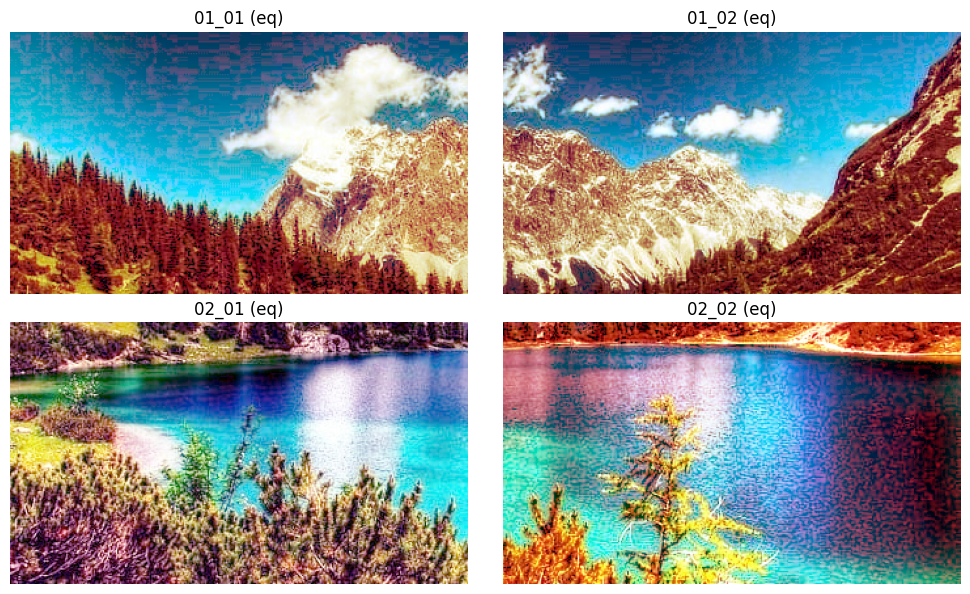

In [54]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))

plt.subplot(2,2,1); plt.imshow(Image.open('data/image_01_01_eq.png')); plt.axis('off'); plt.title('01_01 (eq)')
plt.subplot(2,2,2); plt.imshow(Image.open('data/image_01_02_eq.png')); plt.axis('off'); plt.title('01_02 (eq)')
plt.subplot(2,2,3); plt.imshow(Image.open('data/image_02_01_eq.png')); plt.axis('off'); plt.title('02_01 (eq)')
plt.subplot(2,2,4); plt.imshow(Image.open('data/image_02_02_eq.png')); plt.axis('off'); plt.title('02_02 (eq)')

plt.tight_layout(); plt.show()


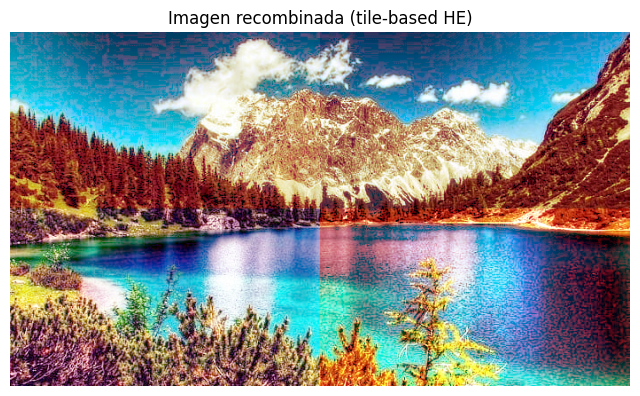

In [55]:
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# --- Parámetros de tu caso ---
base_dir = Path('data')
base_name = 'image'   # 'image' en 'image_01_01.png'
rows, cols = 2, 2     # n=4 => 2x2
suffix = '_eq'        # si guardaste sin sufijo, usa '' (cadena vacía)

# 1) Abrir el primer tile para conocer el tamaño
first_tile_path = base_dir / f'{base_name}_01_01{suffix}.png'
tile0 = Image.open(first_tile_path)
tile_w, tile_h = tile0.size

# 2) Crear lienzo vacío del tamaño total
W, H = cols * tile_w, rows * tile_h
canvas = Image.new('RGB', (W, H))

# 3) Pegar cada tile en su sitio
for r in range(1, rows+1):
    for c in range(1, cols+1):
        p = base_dir / f'{base_name}_{r:02d}_{c:02d}{suffix}.png'
        tile = Image.open(p).convert('RGB')  # asegurar modo consistente
        x = (c-1) * tile_w
        y = (r-1) * tile_h
        canvas.paste(tile, (x, y))

# 4) Mostrar y guardar
plt.figure(figsize=(8, 6))
plt.imshow(canvas); plt.axis('off')
plt.title('Imagen recombinada (tile-based HE)')
plt.show()

canvas.save(base_dir / f'{base_name}_tile_based_equalized.png')


Se puede observar diferencias entre los el contraste de los bloques, ¿cómo podría mejorarse?

 Es esperado que existan diferencias de contraste entre los bloques, porque cada tile se ecualiza con su propio histograma sin considerar a los vecinos. Esto provoca que cada región tenga un rango dinámico distinto y, al unirlas, se noten bordes y cambios de color. Para mejorar esto, se pueden usar técnicas como interpolación entre tiles y limitación del contraste (por ejemplo, CLAHE), que suavizan las transiciones y evitan que un bloque se vea demasiado distinto de otro, logrando un resultado más uniforme y natural.



# 2. Método del Sliding Window Adaptive Histogram Equalization (SWAHE)

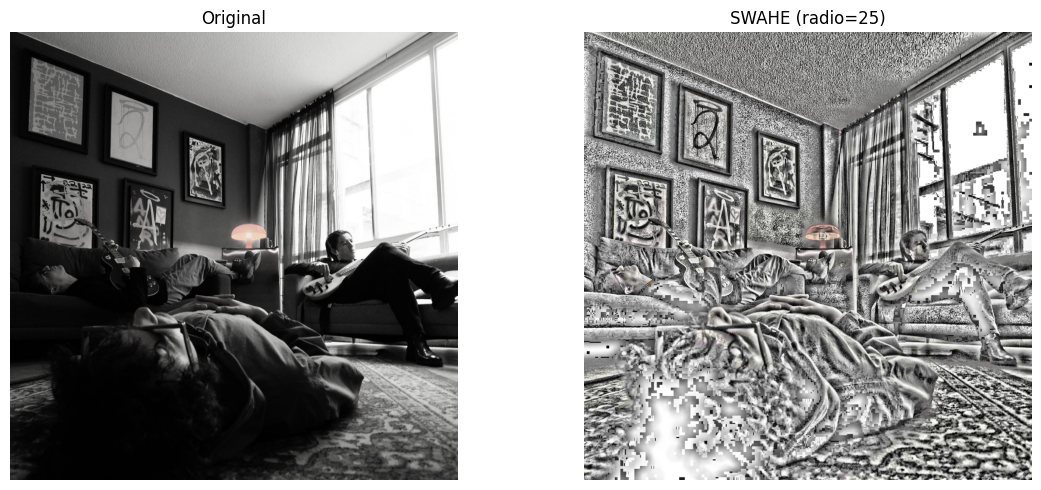

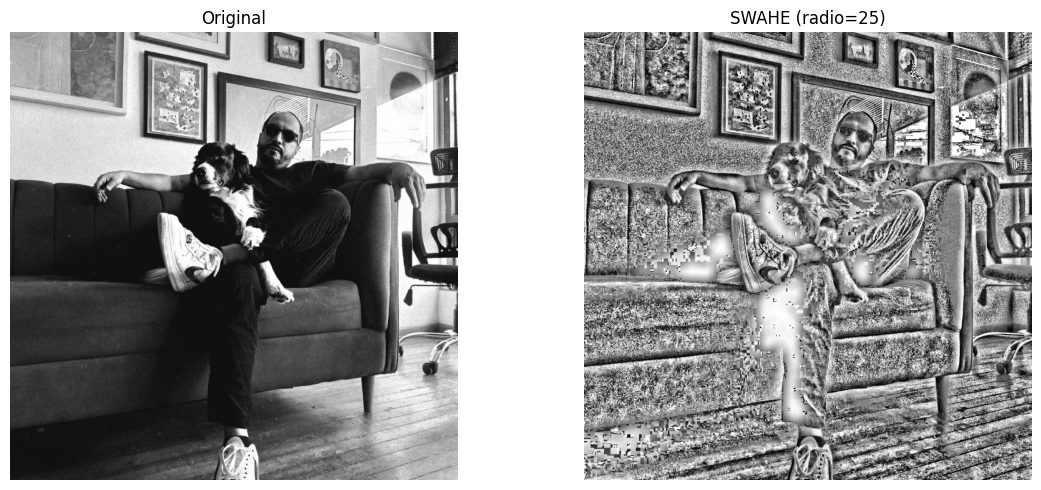

In [61]:
# ===============================
#  SWAHE (Sliding Window AHE) demo
# ===============================

# (Si no tienes scikit-image instalado, descomenta esta línea en Colab)
# !pip -q install scikit-image pillow matplotlib

from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# scikit-image para color y operador de ecualización local
from skimage import color, util
from skimage.filters import rank
from skimage.morphology import disk

# -------------------------------
# Función: SWAHE sobre una imagen RGB
#   - Trabaja en HSV para no distorsionar cromas.
#   - Aplica ecualización local SOLO a V (luminancia) con ventana circular.
#   - Parámetro clave: radius (en píxeles). Ventana efectiva ≈ (2*radius + 1).
# -------------------------------
def swahe_rgb(image_rgb_uint8: np.ndarray, radius: int = 15) -> np.ndarray:
    """
    Aplica SWAHE canal V (HSV) con rank.equalize (ventana deslizante).
    Entradas:
        image_rgb_uint8: ndarray uint8 de forma (H, W, 3) en RGB.
        radius: radio del disco estructurante (p.ej., 8–30).
    Retorna:
        ndarray uint8 RGB con luminancia ecualizada localmente.
    """
    # 1) Convertir a float [0,1] para HSV
    rgb_float = image_rgb_uint8.astype(np.float32) / 255.0
    hsv = color.rgb2hsv(rgb_float)  # hsv[..., 2] = V (luminancia/b brillo)

    # 2) rank.equalize requiere uint8 → pasamos V a [0..255] uint8
    V_u8 = util.img_as_ubyte(hsv[..., 2])  # escala [0,1] -> [0,255] uint8

    # 3) Estructurante: disco de radio 'radius'
    selem = disk(radius)

    # 4) Ecualización local "deslizante" en V
    V_eq_u8 = rank.equalize(V_u8, footprint=disk(radius))  # SWAHE sobre luminancia

    # 5) Volver a float [0,1] y reconstruir HSV
    hsv_eq = hsv.copy()
    hsv_eq[..., 2] = V_eq_u8.astype(np.float32) / 255.0

    # 6) HSV -> RGB y a uint8
    rgb_eq = color.hsv2rgb(hsv_eq)
    rgb_eq_u8 = np.clip(rgb_eq * 255.0, 0, 255).astype(np.uint8)
    return rgb_eq_u8

# -------------------------------
# Utilidad: cargar imagen a RGB uint8
# -------------------------------
def load_rgb(path: str) -> np.ndarray:
    im = Image.open(path).convert('RGB')
    return np.array(im)

# -------------------------------
# Visualización lado a lado
# -------------------------------
def show_side_by_side(rgb_before: np.ndarray, rgb_after: np.ndarray, title_after: str):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1); plt.imshow(rgb_before); plt.title('Original'); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(rgb_after);  plt.title(title_after); plt.axis('off')
    plt.tight_layout(); plt.show()

# ===============================
#  PRUEBA en tus dos imágenes
# ===============================
paths = ['data/lying.png', 'data/with_dog.png']
radius = 25 # <- parámetro clave (prueba 8, 15, 25, según tamaño de la imagen)

for p in paths:
    assert Path(p).exists(), f"No encuentro {p}"
    rgb = load_rgb(p)
    rgb_swahe = swahe_rgb(rgb, radius=radius)
    show_side_by_side(rgb, rgb_swahe, f'SWAHE (radio={radius})')


# 3. CLAHE (contrast limited adaptive histogram equalization)

In [62]:
# -*- coding: utf-8 -*-
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Rutas de entrada/salida
in_paths = [
    "data/lying.png",
    "data/with_dog.png",
]
out_dir = "data/output_clahe"
os.makedirs(out_dir, exist_ok=True)

print("Salida:", os.path.abspath(out_dir))

Salida: /content/data/output_clahe


In [63]:
def apply_clahe(gray_img: np.ndarray,
                clip_limit: float = 3.0,
                tile_grid_size: tuple = (8, 8)) -> np.ndarray:
    """
    Aplica CLAHE a una imagen en escala de grises (uint8 o uint16).

    Parámetros:
    - clip_limit:   Límite de contraste por bloque (típico 2.0–4.0).
                    Valores más altos -> más contraste local, pero pueden amplificar ruido.
    - tile_grid_size: Tamaño de la rejilla (n_tiles_x, n_tiles_y), típico (8,8) o (16,16).
                      Bloques más pequeños -> más adaptación local (y más riesgo de realzar ruido/grano).
    """
    # Asegura que sea 1 canal
    if len(gray_img.shape) == 3:
        gray_img = cv2.cvtColor(gray_img, cv2.COLOR_BGR2GRAY)

    # Crea el objeto CLAHE
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    # OpenCV soporta 8-bit y 16-bit. Si tu PNG es 8-bit (lo usual), esto es directo.
    enhanced = clahe.apply(gray_img)

    return enhanced

In [64]:
def show_before_after(img_before: np.ndarray, img_after: np.ndarray, title_before="Original", title_after="CLAHE"):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(img_before, cmap="gray", vmin=0, vmax=255)
    plt.title(title_before)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.imshow(img_after, cmap="gray", vmin=0, vmax=255)
    plt.title(title_after)
    plt.axis("off")

    plt.tight_layout()
    plt.show()

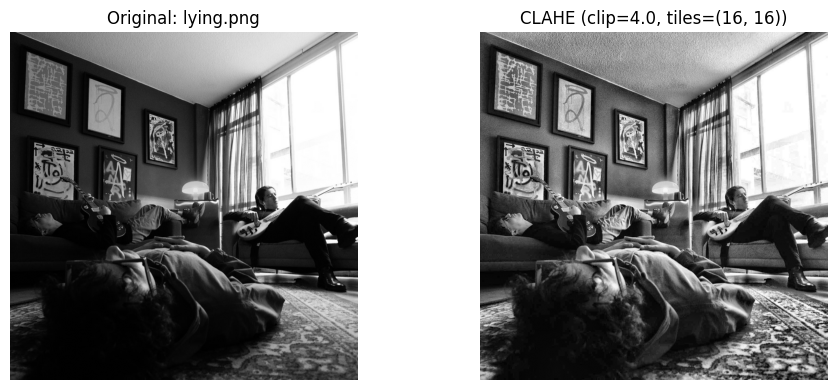

Guardado: data/output_clahe/lying_CLAHE_c4.0_t16x16.png


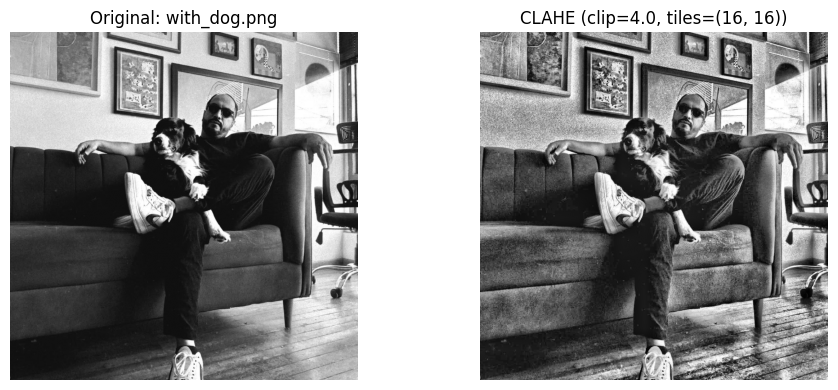

Guardado: data/output_clahe/with_dog_CLAHE_c4.0_t16x16.png


In [68]:
# Parámetros iniciales (ajústalos si lo deseas)
clip_limit = 4.0
tile_grid_size = (16, 16)

for in_path in in_paths:
    assert os.path.exists(in_path), f"No se encontró el archivo: {in_path}"

    # Leer en escala de grises (uint8)
    img = cv2.imread(in_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"No se pudo leer la imagen: {in_path}")

    # Aplicar CLAHE
    img_clahe = apply_clahe(img, clip_limit=clip_limit, tile_grid_size=tile_grid_size)

    # Mostrar antes / después
    show_before_after(img, img_clahe,
                      title_before=f"Original: {os.path.basename(in_path)}",
                      title_after=f"CLAHE (clip={clip_limit}, tiles={tile_grid_size})")

    # Guardar resultados
    name, ext = os.path.splitext(os.path.basename(in_path))
    out_path = os.path.join(out_dir, f"{name}_CLAHE_c{clip_limit}_t{tile_grid_size[0]}x{tile_grid_size[1]}.png")
    cv2.imwrite(out_path, img_clahe)
    print("Guardado:", out_path)


El método Contrast Limited Adaptive Histogram Equalization (CLAHE) es una técnica de procesamiento de imágenes diseñada para mejorar el contraste local sin amplificar excesivamente el ruido. A diferencia de la ecualización global, CLAHE divide la imagen en pequeñas regiones (tiles), aplica ecualización de histograma adaptativa en cada una y luego combina los resultados mediante interpolación para evitar bordes visibles. Además, introduce un límite de contraste (clip limit) que restringe la redistribución de intensidades, evitando que áreas homogéneas se saturen o se vean artificialmente realzadas. Esta técnica se utiliza ampliamente en imágenes médicas, fotografías con iluminación desigual y aplicaciones donde se requiere resaltar detalles sin perder naturalidad.

Referencia:
Stimper, V., Bauer, S., Ernstorfer, R., & Xian, R. P. (2019). Multidimensional Contrast Limited Adaptive Histogram Equalization. Max Planck Institute for Intelligent Systems. Recuperado de https://arxiv.org/pdf/1906.11355v3.pdf1.